C:\Users\User\AppData\Local\Temp\ipykernel_24340\3328511998.py:34: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


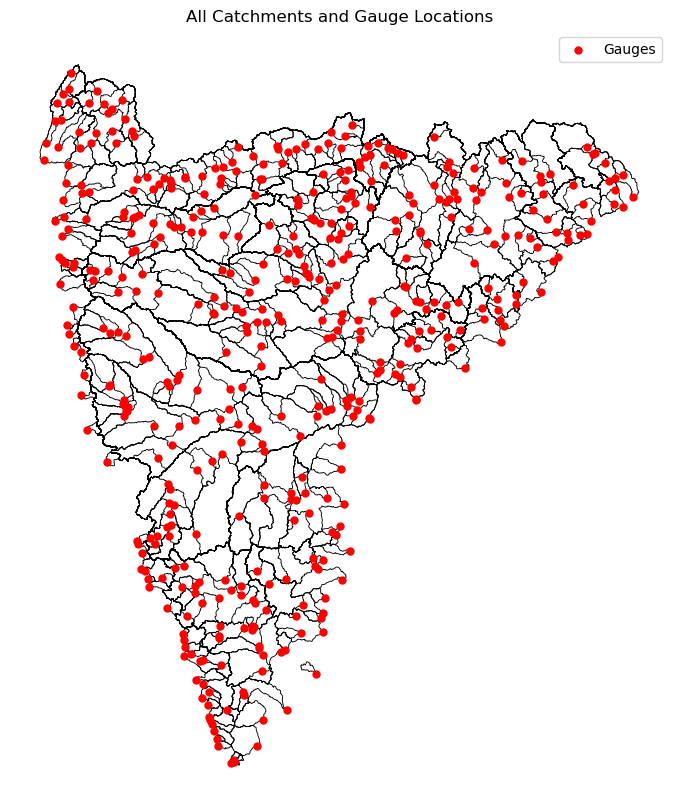

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Directory containing shapefiles
shp_dir = r"C:\Users\User\OneDrive - The University of Melbourne\1 Poornima_Research_Work\5 Elasticity\shapefiles\merged"

# Read shapefiles
catchments = gpd.read_file(os.path.join(shp_dir, "all_catchments.shp"))
gauges = gpd.read_file(os.path.join(shp_dir, "all_gauge_stations.shp"))

# Ensure same CRS
gauges = gauges.to_crs(catchments.crs)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))

catchments.plot(
    ax=ax,
    edgecolor="black",
    facecolor="none",
    linewidth=0.6,
    label="Catchments"
)

gauges.plot(
    ax=ax,
    color="red",
    markersize=25,
    label="Gauges"
)

ax.set_title("All Catchments and Gauge Locations")
ax.legend()
ax.set_axis_off()

plt.show()


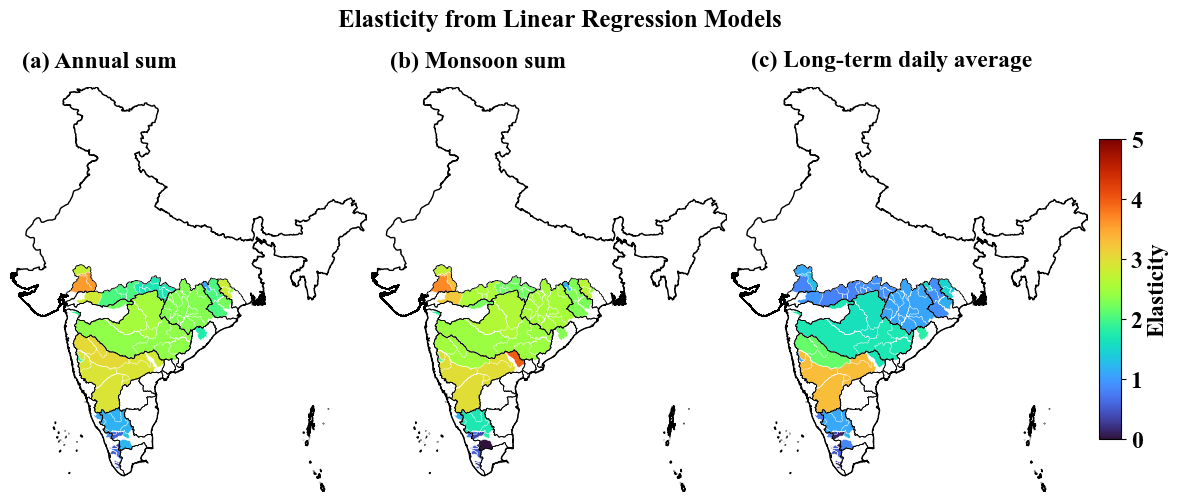

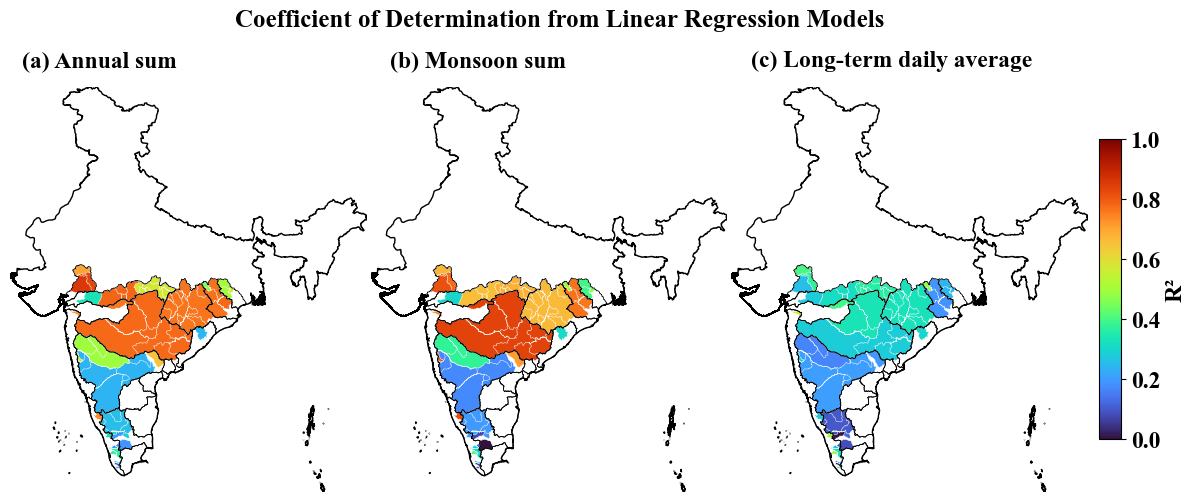

In [2]:
# =====================================================
# IMPORTS
# =====================================================
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize

mpl.rcParams["font.family"] = "Times New Roman"

# =====================================================
# PATHS
# =====================================================
data_dir = r"C:\Users\User\OneDrive - The University of Melbourne\1 Poornima_Research_Work\5 Elasticity"
plot_dir = os.path.join(data_dir, "spatial plots")
shp_dir  = os.path.join(data_dir, "shapefiles")
os.makedirs(plot_dir, exist_ok=True)

# =====================================================
# READ DATA
# =====================================================
summary_df = pd.read_excel(
    os.path.join(data_dir, "df_LinearRegressionModel_Result.xlsx")
)
summary_df["gauge_id"] = summary_df["gauge_id"].astype(str).str.zfill(5)

# =====================================================
# READ SHAPEFILES
# =====================================================
def read_and_project(path):
    return gpd.read_file(path).set_crs(4326).to_crs(3857)

catchments_gdf = read_and_project(
    os.path.join(shp_dir, "merged", "all_catchments.shp")
)
basins_gdf = read_and_project(
    os.path.join(shp_dir, "merged", "major_basins.shp")
)
india_gdf = read_and_project(
    os.path.join(shp_dir, "India", "india_boundary.shp")
)

catchments_gdf["gauge_id"] = catchments_gdf["gauge_id"].astype(str).str.zfill(5)

# =====================================================
# SPATIAL MERGE
# =====================================================
spatial_gdf = catchments_gdf.merge(summary_df, on="gauge_id", how="inner")

# =====================================================
# COLUMN SETS
# =====================================================
elasticity_cols = [
    "Elasticity_AnnualSum",
    "Elasticity_MonsoonSum",
    "Elasticity_LTDA"
]

r2_cols = [
    "R2_AnnualSum",
    "R2_MonsoonSum",
    "R2_LTDA"
]

titles = ["(a) Annual sum", "(b) Monsoon sum", "(c) Long-term daily average"]
title_x = [0.25, 0.3, 0.45]

# =====================================================
# NORMALISATION
# =====================================================
ELASTICITY_NORM = Normalize(
    vmin=0.0,
    vmax=5 #spatial_gdf[elasticity_cols].max().max()
)
R2_NORM = Normalize(vmin=0.0, vmax=1.0)

# =====================================================
# GENERIC PLOTTING FUNCTION
# =====================================================
def plot_spatial_panel(
    gdf, cols, norm, cbar_label, suptitle, outfile
):
    fig, axes = plt.subplots(1, 3, figsize=(11, 5), gridspec_kw={"wspace": 0.01})

    for ax, col, title, xloc in zip(axes, cols, titles, title_x):
        gdf.plot(
            column=col,
            cmap="turbo",
            norm=norm,
            edgecolor="none",
            ax=ax
        )
    
        gdf.boundary.plot(ax=ax, color="white", linewidth=0.3)
        basins_gdf.boundary.plot(ax=ax, color="black", linewidth=0.5)
        india_gdf.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)
    
        ax.margins(0)        # 🔥 KEY LINE
        ax.set_axis_off()
    
        ax.set_title(
            title,
            fontsize=17,
            fontweight="bold",
            x=xloc,
            y=1.05,
            pad=0
        )

    # ---- COLORBAR ----
    cax = fig.add_axes([0.99, 0.2, 0.02, 0.60])
    cbar = fig.colorbar(
        mpl.cm.ScalarMappable(norm=norm, cmap="turbo"),
        cax=cax
    )
    cbar.set_label(cbar_label, fontsize=17, fontweight="bold")
    cbar.ax.tick_params(labelsize=17)
    for t in cbar.ax.get_yticklabels():
        t.set_fontweight("bold")

    fig.suptitle(
        suptitle,
        fontsize=18,
        fontweight="bold",
        y=1.06
    )

    plt.subplots_adjust(left=0, right=0.98, top=1, bottom=0, wspace=0)

    plt.savefig(
        os.path.join(plot_dir, outfile),
        dpi=400,
        bbox_inches="tight"
    )
    plt.show()

# =====================================================
# FIGURE 1: ELASTICITY
# =====================================================
plot_spatial_panel(
    spatial_gdf,
    elasticity_cols,
    ELASTICITY_NORM,
    "Elasticity",
    "Elasticity from Linear Regression Models",
    "1 Elasticity_LR.png"
)

# =====================================================
# FIGURE 2: R²
# =====================================================
plot_spatial_panel(
    spatial_gdf,
    r2_cols,
    R2_NORM,
    "R²",
    "Coefficient of Determination from Linear Regression Models",
    "1 R2_LR.png"
)

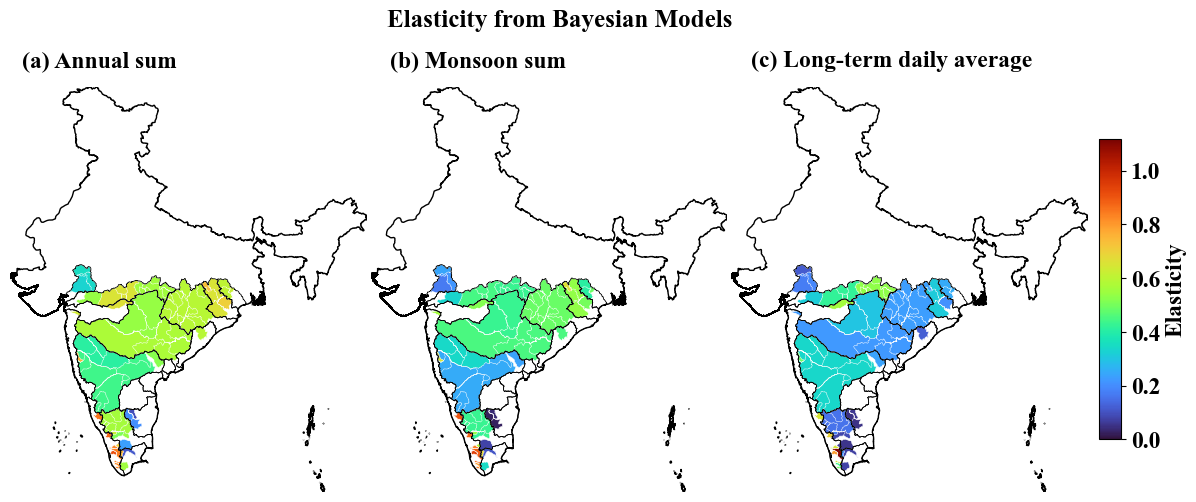

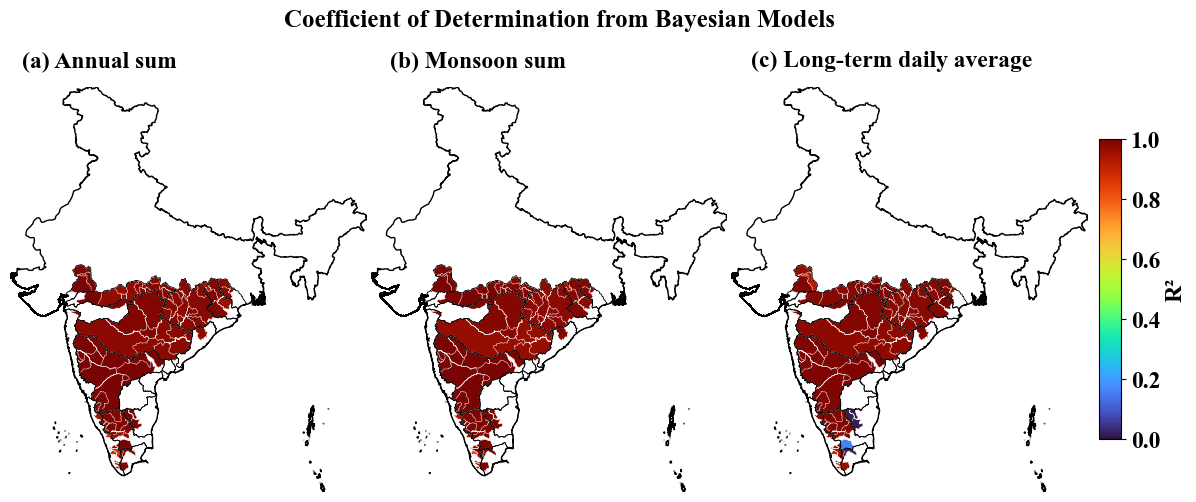

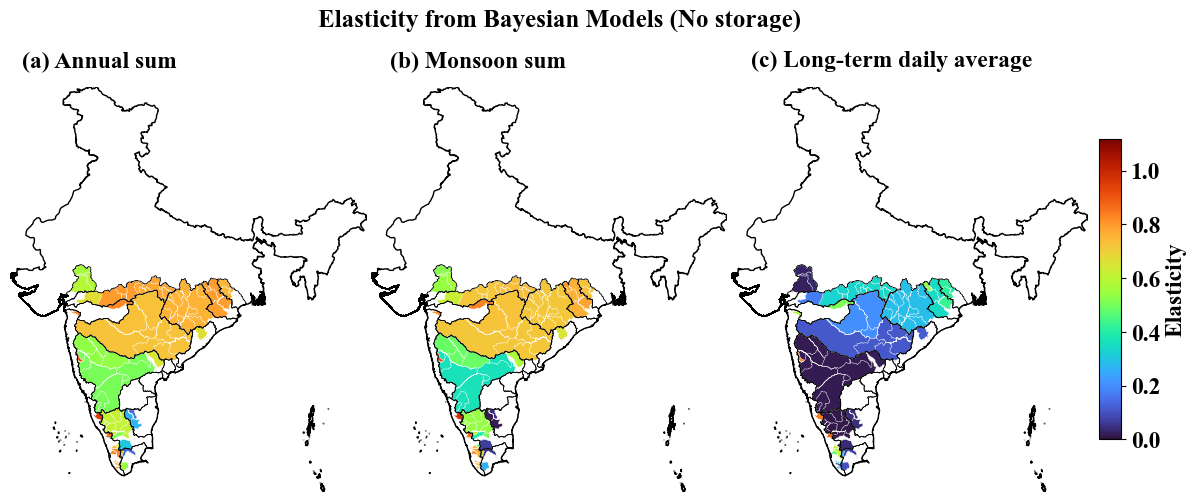

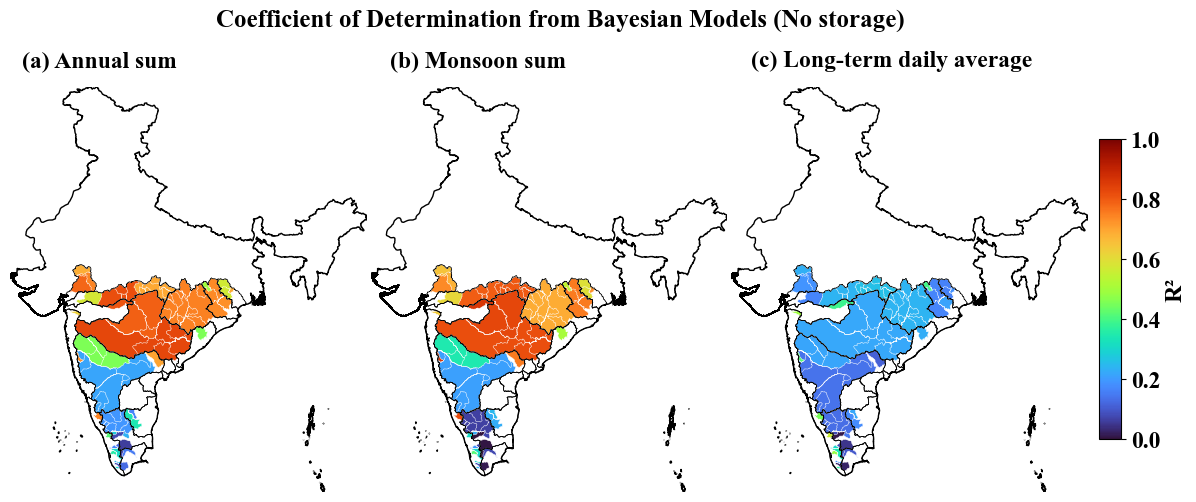

In [59]:
# =====================================================
# IMPORTS & GLOBALS
# =====================================================
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize

mpl.rcParams["font.family"] = "Times New Roman"

titles = ["(a) Annual sum", "(b) Monsoon sum", "(c) Long-term daily average"]
title_x = [0.25, 0.3, 0.45]
# =====================================================
# PATHS
# =====================================================
BASE = r"C:\Users\User\OneDrive - The University of Melbourne\1 Poornima_Research_Work\5 Elasticity"
TRACE = os.path.join(BASE, "traces_bayes")
PLOT  = os.path.join(BASE, "spatial plots")
SHP   = os.path.join(BASE, "shapefiles")
os.makedirs(PLOT, exist_ok=True)

# =====================================================
# HELPERS
# =====================================================
def read_project(path):
    return gpd.read_file(path).set_crs(4326).to_crs(3857)

def mode_suffix(mode):
    return " (No storage)" if mode == "No Storage" else ""

def plot_1x3(spatial_list, col, norm, suptitle, cbar_label, fname):
    fig, axes = plt.subplots(1, 3, figsize=(11, 5), gridspec_kw={"wspace": 0.01})

    for ax, gdf, t, xloc in zip(axes, spatial_list, titles, title_x):
        gdf.plot(col, cmap="turbo", norm=norm, ax=ax, edgecolor="none")
        gdf.boundary.plot(ax=ax, color="white", lw=0.3)
        basins.boundary.plot(ax=ax, color="black", lw=0.5)
        india.plot(ax=ax, facecolor="none", edgecolor="black", lw=1)
        ax.margins(0)        # 🔥 KEY LINE
        ax.set_axis_off()
    
        ax.set_title(
            t,
            fontsize=17,
            fontweight="bold",
            x=xloc,
            y=1.05,
            pad=0
        )

    cax = fig.add_axes([0.99, 0.2, 0.02, 0.6])
    cb  = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap="turbo"), cax=cax)
    cb.set_label(cbar_label, fontsize=17, fontweight="bold")
    cb.ax.tick_params(labelsize=17)
    for tt in cb.ax.get_yticklabels():
        tt.set_fontweight("bold")

    fig.suptitle(
        suptitle,
        fontsize=18,
        fontweight="bold",
        y=1.06
    )
    plt.subplots_adjust(left=0, right=0.98, top=1, bottom=0, wspace=0)
    plt.savefig(os.path.join(PLOT, fname), dpi=400, bbox_inches="tight")
    plt.show()

def build_spatial(file, summary, catchments):
    df = pd.read_excel(os.path.join(TRACE, file))
    df["gauge_id"] = df["gauge_id"].astype(str).str.zfill(5)

    agg = (
        summary.merge(df, left_on="Gauge_ID", right_on="gauge_id")
        .groupby("Gauge_ID", as_index=False)
        .agg(Elasticity=("Elasticity", "mean"), R2=("R2", "mean"))
    )

    return catchments.merge(
        agg, left_on="gauge_id", right_on="Gauge_ID"
    )

# =====================================================
# READ DATA
# =====================================================
summary = pd.read_excel(os.path.join(BASE, "Basin_Station_Summary.xlsx"))
summary["Gauge_ID"] = summary["Gauge_ID"].astype(str).str.zfill(5)

catchments = read_project(os.path.join(SHP, "merged", "all_catchments.shp"))
basins     = read_project(os.path.join(SHP, "merged", "major_basins.shp"))
india      = read_project(os.path.join(SHP, "India", "india_boundary.shp"))
catchments["gauge_id"] = catchments["gauge_id"].astype(str).str.zfill(5)

# =====================================================
# FILE GROUPS
# =====================================================
groups = {
    "Storage": [
        "ElasticityBM_AnnualSum.xlsx",
        "ElasticityBM_Monsoon.xlsx",
        "ElasticityBM_LongTermMean.xlsx",
    ],
    "No Storage": [
        "ElasticityBM_AnnualSum_NoStorage.xlsx",
        "ElasticityBM_MonsoonSum_NoStorage.xlsx",
        "ElasticityBM_LongTermMean_NoStorage.xlsx",
    ]
}

# =====================================================
# GLOBAL NORMALISATION
# =====================================================
elasticity_max = pd.concat(
    [pd.read_excel(os.path.join(TRACE, f))["Elasticity"]
     for g in groups.values() for f in g]
).max()

ELASTICITY_NORM = Normalize(0, elasticity_max)
R2_NORM         = Normalize(0, 1)

# =====================================================
# MAIN LOOP
# =====================================================
for mode, files in groups.items():

    spatial = [build_spatial(f, summary, catchments) for f in files]

    plot_1x3(
        spatial, "Elasticity", ELASTICITY_NORM,
        f"Elasticity from Bayesian Models{mode_suffix(mode)}",
        "Elasticity",
        f"2 Elasticity_Bayesian_{mode.replace(' ', '_')}.png"
    )

    plot_1x3(
        spatial, "R2", R2_NORM,
        f"Coefficient of Determination from Bayesian Models{mode_suffix(mode)}",
        "R²",
        f"2 R2_Bayesian_{mode.replace(' ', '_')}.png"
    )


In [5]:
spatial_gdf

gauge_id                                           geometry Gauge_ID  \
0     03005  POLYGON ((8689874.636 2492406.127, 8689840.99 ...    03005   
1     03008  POLYGON ((8459352.953 2335448.064, 8465195.619...    03008   
2     03018  POLYGON ((9017352.45 2201477.212, 9017319.164 ...    03018   
3     03045  POLYGON ((9039495.314 2031687.404, 9039462.3 2...    03045   
4     03055  POLYGON ((8180124.613 2262549.862, 8180086.55 ...    03055   
..      ...                                                ...      ...   
85    17006  POLYGON ((8637329.324 1441090.864, 8637068.033...    17006   
86    17011  POLYGON ((8593295.346 1011299.854, 8593329.03 ...    17011   
87    17015  POLYGON ((8594221.75 1084142.121, 8594280.511 ...    17015   
88    17019  POLYGON ((8594221.75 1084142.121, 8594280.511 ...    17019   
89    17022  POLYGON ((8637329.324 1441090.864, 8637068.033...    17022   

    Elasticity        R2  
0     0.318138  0.276513  
1     0.126115  0.184941  
2     0.356715  0.287218  
3     0.530518  0.367046  
4     0.016018  0.058350  
..         ...       ...  
85    0.023950  0.144010  
86    0.096742  0.026979  
87    0.072986  0.098775  
88    0.218045  0.095027  
89    0.040048  0.178839  

[90 rows x 5 columns]

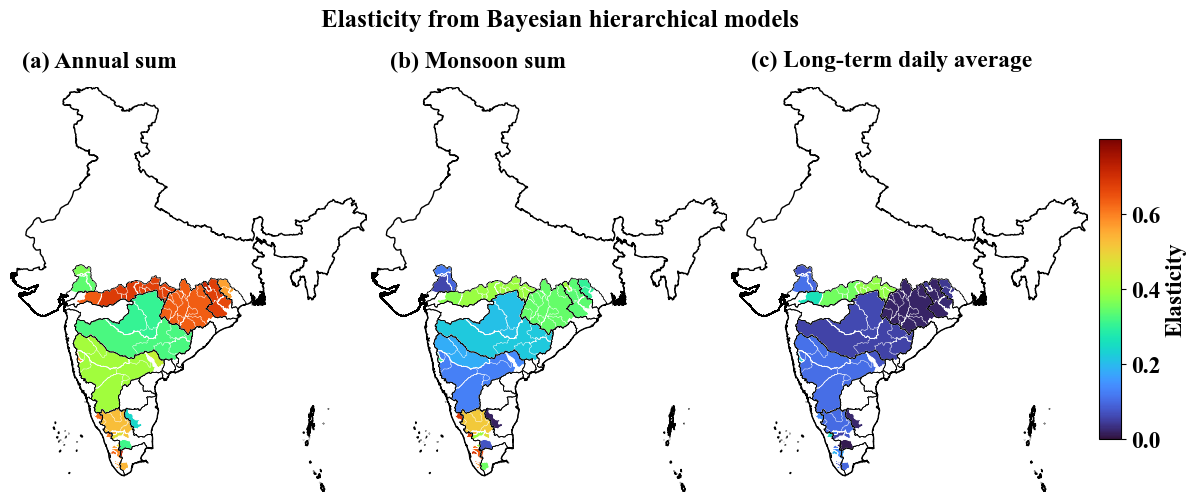

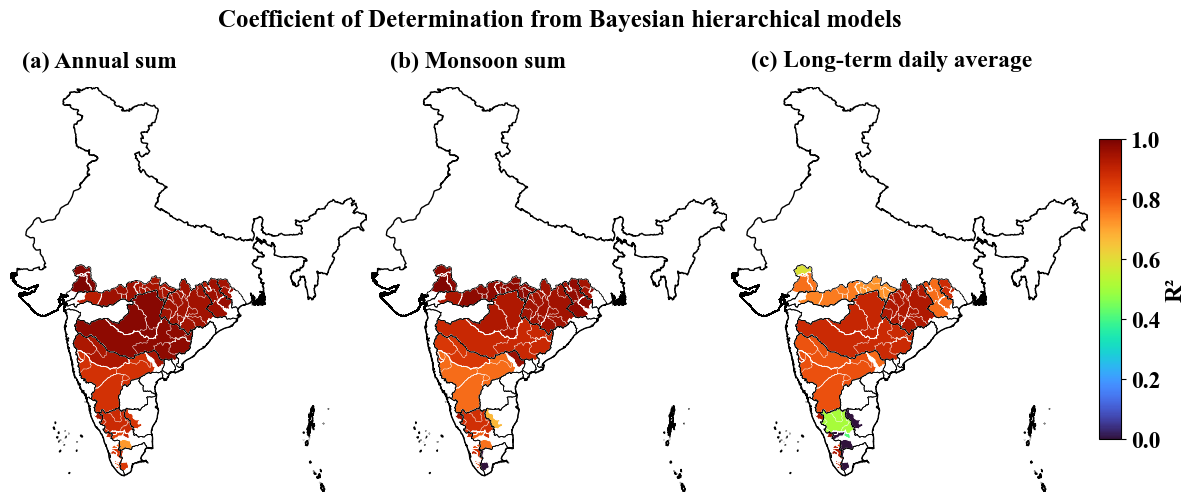


✅ 1×3 Elasticity (0–global max) and R² figures generated successfully.


In [65]:
# ===================================================================================
# IMPORTS & GLOBAL SETTINGS
# ===================================================================================
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize

mpl.rcParams["font.family"] = "Times New Roman"

# ===================================================================================
# PATHS
# ===================================================================================
BASE = r"C:\Users\User\OneDrive - The University of Melbourne\1 Poornima_Research_Work\5 Elasticity"
PLOT = os.path.join(BASE, "spatial plots")
SHP  = os.path.join(BASE, "shapefiles")
XLS  = os.path.join(BASE, "elasticity_results.xlsx")
os.makedirs(PLOT, exist_ok=True)

# ===================================================================================
# TITLES
# ===================================================================================
sheet_names = ["Asum", "Msum", "ltm"]
titles  = ["(a) Annual sum", "(b) Monsoon sum", "(c) Long-term daily average"]
title_x = [0.25, 0.3, 0.45]

# ===================================================================================
# HELPERS
# ===================================================================================
def read_project(path):
    return gpd.read_file(path).set_crs(4326).to_crs(3857)

def compute_global_max(xls, sheets, col):
    return pd.concat(
        [pd.read_excel(xls, sheet_name=s)[col] for s in sheets]
    ).max()

def prepare_spatial_data(xls, sheets, catchments):
    spatial = []

    for s in sheets:
        # --- Read Excel sheet
        df = pd.read_excel(xls, sheet_name=s)
        df["SubBasin"] = df["SubBasin"].astype(str).str.zfill(5)

        # --- Extract valid subbasin gauges from Excel
        valid_gauges = df["SubBasin"].unique()

        # --- Filter catchments to only those gauges
        catchments_sub = catchments[
            catchments["gauge_id"].isin(valid_gauges)
        ].copy()

        # --- Aggregate Excel values at SubBasin level
        agg = df.groupby("SubBasin", as_index=False).agg(
            Elasticity=("Elasticity_epsilon (ε_s)", "mean"),
            R2=("R²", "mean")
        )

        # --- Merge geometry + attributes
        gdf = catchments_sub.merge(
            agg,
            left_on="gauge_id",
            right_on="SubBasin",
            how="left"
        )

        spatial.append(gdf)

    return spatial


def plot_1x3(spatial, col, norm, suptitle, cbar_label, fname):
    fig, axes = plt.subplots(1, 3, figsize=(11, 5), gridspec_kw={"wspace": 0.01})

    for ax, gdf, t, xloc in zip(axes, spatial, titles, title_x):
        gdf.plot(col, cmap="turbo", norm=norm,
                 edgecolor="white", linewidth=0.6, ax=ax)

        gdf.boundary.plot(ax=ax, color="white", lw=0.3)
        basins.boundary.plot(ax=ax, color="black", lw=0.5)
        india.plot(ax=ax, facecolor="none", edgecolor="black", lw=1)

        ax.margins(0)        # 🔥 KEY LINE
        ax.set_axis_off()
    
        ax.set_title(
            t,
            fontsize=17,
            fontweight="bold",
            x=xloc,
            y=1.05,
            pad=0
        )


    cax = fig.add_axes([0.99, 0.2, 0.02, 0.6])
    cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap="turbo"), cax=cax)
    cb.set_label(cbar_label, fontsize=17, fontweight="bold")
    cb.ax.tick_params(labelsize=17)
    for t in cb.ax.get_yticklabels():
        t.set_fontweight("bold")

    fig.suptitle(suptitle, fontsize=18, fontweight="bold", y=1.06)
    plt.subplots_adjust(left=0, right=0.98, top=1, bottom=0, wspace=0)
    plt.savefig(os.path.join(PLOT, fname), dpi=300, bbox_inches="tight")
    plt.show()

# ===================================================================================
# READ SHAPEFILES
# ===================================================================================
catchments = read_project(os.path.join(SHP, "merged", "all_catchments.shp"))
basins     = read_project(os.path.join(SHP, "merged", "major_basins.shp"))
india      = read_project(os.path.join(SHP, "India", "india_boundary.shp"))
catchments["gauge_id"] = catchments["gauge_id"].astype(str).str.zfill(5)

# ===================================================================================
# NORMALISATION
# ===================================================================================
ELASTICITY_NORM = Normalize(
    0, compute_global_max(XLS, sheet_names, "Elasticity_epsilon (ε_s)")
)
R2_NORM = Normalize(0, 1)

# ===================================================================================
# PREPARE DATA
# ===================================================================================
spatial_data = prepare_spatial_data(XLS, sheet_names, catchments)

# ===================================================================================
# PLOTS
# ===================================================================================
plot_1x3(
    spatial_data, "Elasticity", ELASTICITY_NORM,
    "Elasticity from Bayesian hierarchical models",
    "Elasticity", "3 Elasticity_BH.png"
)

plot_1x3(
    spatial_data, "R2", R2_NORM,
    "Coefficient of Determination from Bayesian hierarchical models",
    "R²", "3 R2_BH.png"
)

print("\n✅ 1×3 Elasticity (0–global max) and R² figures generated successfully.")


✅ Global elasticity max: 0.679


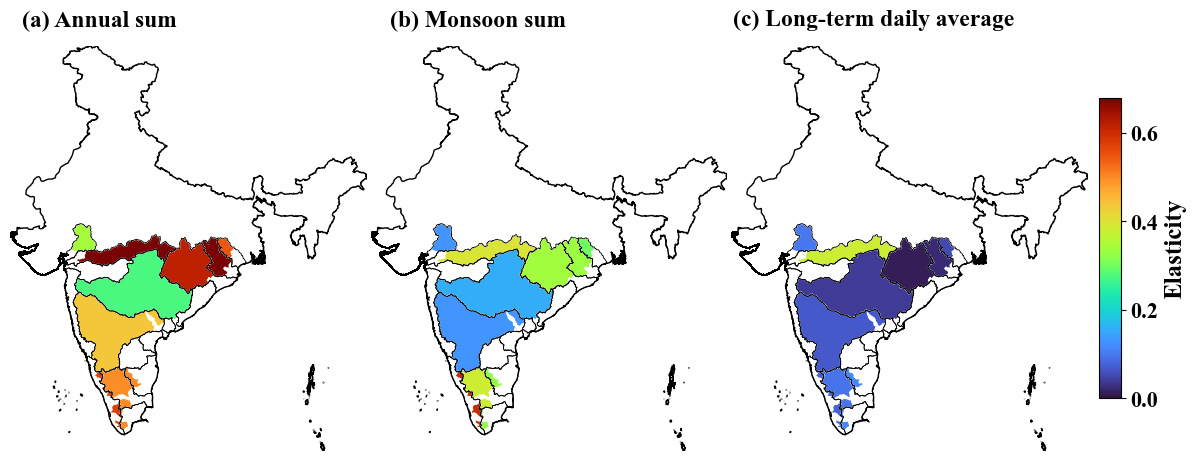


✅ Basin-level spatial elasticity map generated with tight layout and manual colorbar placement.


In [63]:
# ===================================================================================
# BASIN-LEVEL SPATIAL ELASTICITY MAPS (1 ROW × 3 COLS)
# COLOR SCALE: 0 → GLOBAL MAX (Asum & Msum ONLY)
# ===================================================================================

# -----------------------------------------------------------------------------------
# IMPORTS
# -----------------------------------------------------------------------------------
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize

# -----------------------------------------------------------------------------------
# GLOBAL SETTINGS
# -----------------------------------------------------------------------------------
mpl.rcParams["font.family"] = "Times New Roman"

# -----------------------------------------------------------------------------------
# PATHS
# -----------------------------------------------------------------------------------
data_dir  = r"C:\Users\User\OneDrive - The University of Melbourne\1 Poornima_Research_Work\5 Elasticity"
shp_dir   = os.path.join(data_dir, "shapefiles")
plot_dir  = os.path.join(data_dir, "spatial plots")
excel_fp  = os.path.join(data_dir, "elasticity_results.xlsx")

os.makedirs(plot_dir, exist_ok=True)

# -----------------------------------------------------------------------------------
# READ SHAPEFILES
# -----------------------------------------------------------------------------------
catchments_gdf = gpd.read_file(os.path.join(shp_dir, "merged", "all_catchments.shp"))
basins_gdf     = gpd.read_file(os.path.join(shp_dir, "merged", "major_basins.shp"))
india_gdf      = gpd.read_file(os.path.join(shp_dir, "India", "india_boundary.shp"))

# --- ID cleaning ---
catchments_gdf["Gauge_ID"] = (
    catchments_gdf["gauge_id"].astype(str).str.strip().str.zfill(5)
)

# --- CRS ---
catchments_gdf = catchments_gdf.set_crs(4326).to_crs(3857)
basins_gdf     = basins_gdf.set_crs(4326).to_crs(3857)
india_gdf      = india_gdf.set_crs(4326).to_crs(3857)

# -----------------------------------------------------------------------------------
# SHEETS & LABELS
# -----------------------------------------------------------------------------------
sheet_names = ["Asum", "Msum", "ltm"]
time_labels = ["(a) Annual sum", "(b) Monsoon sum", "(c) Long-term daily average"]
title_x = [0.25, 0.35, 0.40]

# -----------------------------------------------------------------------------------
# COMPUTE GLOBAL MAX (Asum, Msum, ltm)
# -----------------------------------------------------------------------------------
global_max = 0.0

for sheet in sheet_names:
    df = pd.read_excel(excel_fp, sheet_name=sheet)
    df["SubBasin"] = df["SubBasin"].astype(str).str.zfill(5)

    basin_df = (
        df[["SubBasin", "Basin", "Basin_mean_epsilon (μ_ε)"]]
        .drop_duplicates()
        .rename(columns={"Basin_mean_epsilon (μ_ε)": "Elasticity"})
    )

    merged = catchments_gdf.merge(
        basin_df,
        left_on="Gauge_ID",
        right_on="SubBasin",
        how="left"
    )

    basin_gdf_tmp = merged.dissolve(by="Basin", aggfunc={"Elasticity": "mean"})
    global_max = max(global_max, basin_gdf_tmp["Elasticity"].max())

print(f"✅ Global elasticity max: {global_max:.3f}")

ELASTICITY_NORM = Normalize(vmin=0.0, vmax=global_max)

# -----------------------------------------------------------------------------------
# CREATE FIGURE
# -----------------------------------------------------------------------------------
fig, axes = plt.subplots(1, 3, figsize=(11, 5), gridspec_kw={"wspace": 0.01})

for ax, sheet, t, xloc in zip(axes, sheet_names, time_labels, title_x):

    df = pd.read_excel(excel_fp, sheet_name=sheet)
    df["SubBasin"] = df["SubBasin"].astype(str).str.zfill(5)

    basin_df = (
        df[["SubBasin", "Basin", "Basin_mean_epsilon (μ_ε)"]]
        .drop_duplicates()
        .rename(columns={"Basin_mean_epsilon (μ_ε)": "Elasticity"})
    )

    merged_gdf = catchments_gdf.merge(
        basin_df,
        left_on="Gauge_ID",
        right_on="SubBasin",
        how="left"
    )

    basin_gdf = (
        merged_gdf
        .dissolve(by="Basin", aggfunc={"Elasticity": "mean"})
        .reset_index()
    )

    basin_gdf.plot(
        column="Elasticity",
        cmap="turbo",
        norm=ELASTICITY_NORM,
        edgecolor="white",
        linewidth=0.8,
        ax=ax
    )

    basins_gdf.boundary.plot(ax=ax, color="black", linewidth=0.5)
    india_gdf.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)

    ax.margins(0)        # 🔥 KEY LINE
    ax.set_axis_off()
    
    ax.set_title(
            t,
            fontsize=17,
            fontweight="bold",
            x=xloc,
            y=1.05,
            pad=0)

# -----------------------------------------------------------------------------------
# SHARED COLORBAR (MANUAL POSITION)
# -----------------------------------------------------------------------------------
cax = fig.add_axes([0.99, 0.2, 0.02, 0.60])

cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=ELASTICITY_NORM, cmap="turbo"),
    cax=cax
)

cbar.set_label("Elasticity", fontsize=18, fontweight="bold")
cbar.ax.tick_params(labelsize=16)
for t in cbar.ax.get_yticklabels():
    t.set_fontweight("bold")
plt.subplots_adjust(
    left=0,
    right=0.98,
    top=1,
    bottom=0,
    wspace=0)
# -----------------------------------------------------------------------------------
# SAVE
# -----------------------------------------------------------------------------------
plt.savefig(
    os.path.join(plot_dir, "4 Basin elasticity_BH.png"),
    dpi=400,
    bbox_inches="tight"
)
plt.show()

print("\n✅ Basin-level spatial elasticity map generated with tight layout and manual colorbar placement.")


In [4]:
catchments_gdf

gauge_id                                           geometry
0      03001  POLYGON ((8904542.201 2047688.175, 8904345.658...
1      03002  POLYGON ((9082645.658 2217224.991, 9081426.39 ...
2      03003  POLYGON ((8884111.708 2367548.859, 8883933.968...
3      03004  POLYGON ((8459352.953 2335448.064, 8465195.619...
4      03005  POLYGON ((8689874.636 2492406.127, 8689840.99 ...
..       ...                                                ...
467    17021  POLYGON ((8765863.114 1488657.198, 8765728.565...
468    17022  POLYGON ((8637329.324 1441090.864, 8637068.033...
469    17023  POLYGON ((8810381.57 1521542.397, 8810277.778 ...
470    17024  POLYGON ((8637329.324 1441090.864, 8637068.033...
471    17025  POLYGON ((8717132.472 1277026.024, 8717132.631...

[472 rows x 2 columns]


Polygons plotted: 270
Unique gauges: 90


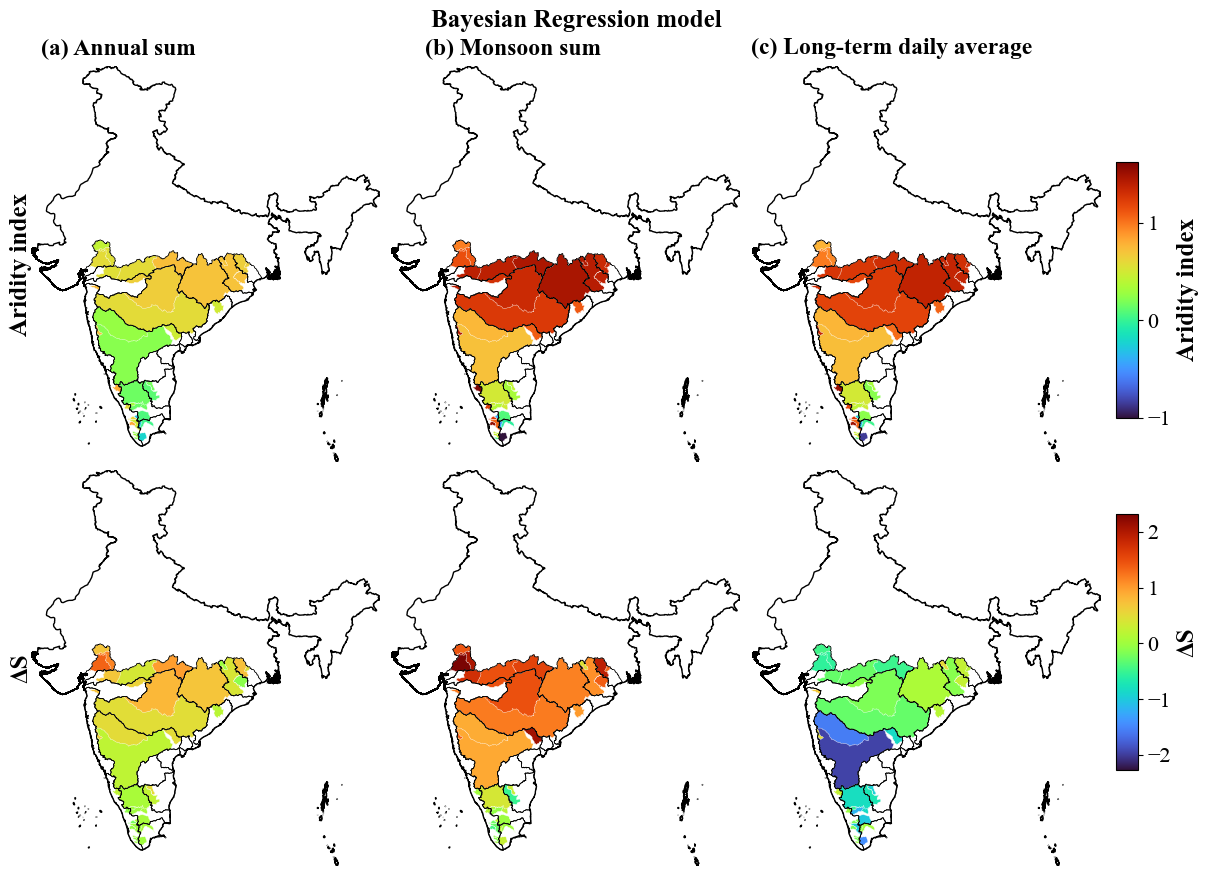


Polygons plotted: 234
Unique gauges: 78


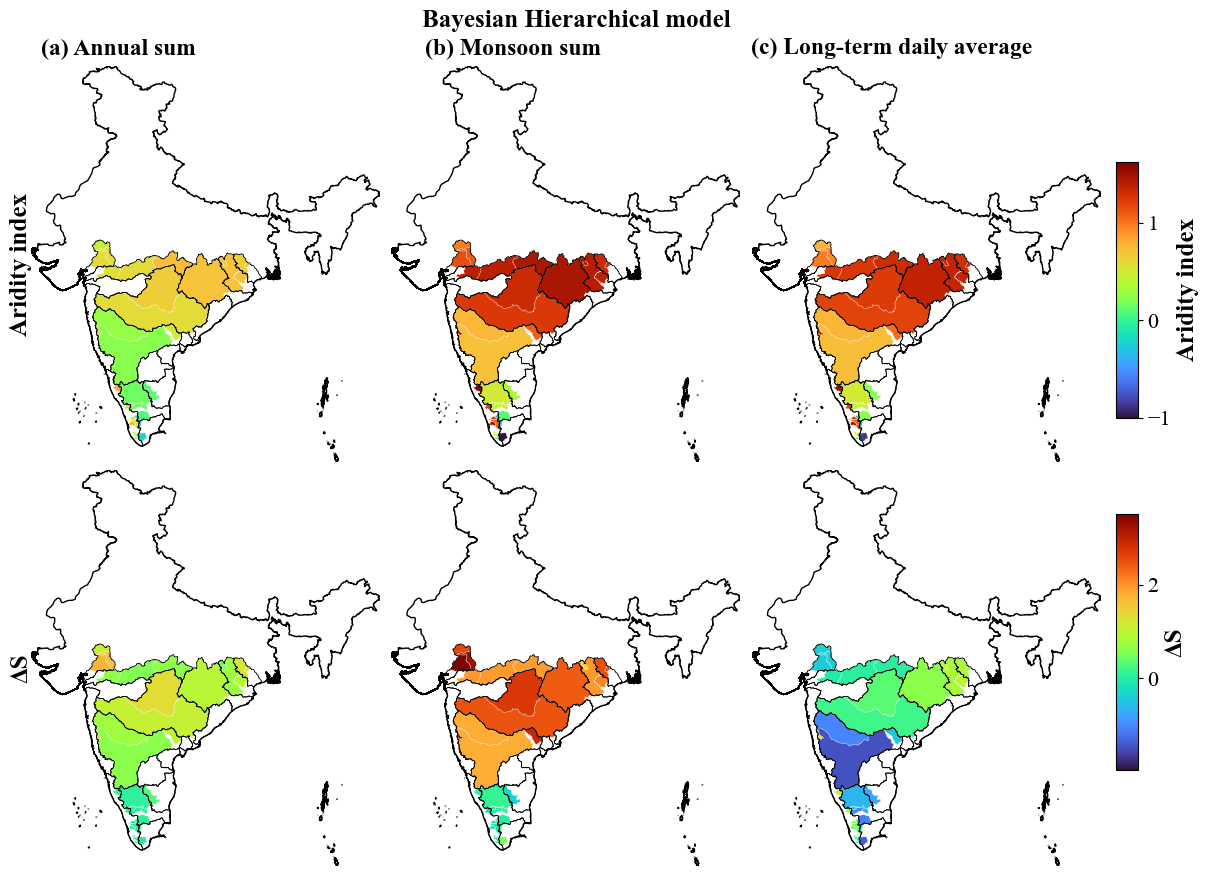

In [11]:
# =====================================================
# IMPORTS
# =====================================================
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize

mpl.rcParams["font.family"] = "Times New Roman"

# =====================================================
# PATHS
# =====================================================
data_dir = r"C:\Users\User\OneDrive - The University of Melbourne\1 Poornima_Research_Work\5 Elasticity"
plot_dir = os.path.join(data_dir, "spatial plots")
shp_dir  = os.path.join(data_dir, "shapefiles")
os.makedirs(plot_dir, exist_ok=True)

delta_file = os.path.join(data_dir, "Delta_S_estimates.xlsx")
title_x = [0.25, 0.35, 0.40]

# =====================================================
# READ SHAPEFILES
# =====================================================
def read_and_project(path):
    return gpd.read_file(path).set_crs(4326).to_crs(3857)

catchments_gdf = read_and_project(
    os.path.join(shp_dir, "merged", "all_catchments.shp")
)
basins_gdf = read_and_project(
    os.path.join(shp_dir, "merged", "major_basins.shp")
)
india_gdf = read_and_project(
    os.path.join(shp_dir, "India", "india_boundary.shp")
)

# ensure consistent gauge id format
catchments_gdf["gauge_id"] = catchments_gdf["gauge_id"].astype(str).str.zfill(5)

# =====================================================
# GENERIC 2x3 PLOT FUNCTION
# =====================================================
def plot_2x3_panel(summary_df, model_name, outfile):

    # merge site-level data to catchments
    gdf = catchments_gdf.merge(
        summary_df,
        left_on="gauge_id",
        right_on="Gauge_ID",
        how="inner"
    )

    print("\nPolygons plotted:", len(gdf))
    print("Unique gauges:", gdf["gauge_id"].nunique())

    timescales = ["Asum", "Msum", "ltm"]
    col_titles = ["(a) Annual sum", "(b) Monsoon sum", "(c) Long-term daily average"]

    fig, axes = plt.subplots(
        2, 3,
        figsize=(11, 8),
        gridspec_kw={"wspace": 0.01, "hspace": 0.02}
    )

    # =================================================
    # GLOBAL SYMMETRIC NORMALIZATION
    # =================================================
    global_max = max(
        abs(gdf["Aridity_mean"].min()),
        abs(gdf["Aridity_mean"].max()),
        abs(gdf["Delta_S_mean"].min()),
        abs(gdf["Delta_S_mean"].max())
    )

    arid_norm  = Normalize(vmin=gdf["Aridity_mean"].min(), vmax=gdf["Aridity_mean"].max())
    delta_norm = Normalize(vmin=gdf["Delta_S_mean"].min(), vmax=gdf["Delta_S_mean"].max())

    # =================================================
    # PLOTTING
    # =================================================
    for j, ts in enumerate(timescales):

        df_ts = gdf[gdf["Timescale"] == ts]

        ax  = axes[0, j]
        ax2 = axes[1, j]

        # ---------------------------------------------
        # LAYER 1 — ALL CATCHMENTS (WHITE BOUNDARIES)
        # ---------------------------------------------
        catchments_gdf.boundary.plot(
            ax=ax,
            color="white",
            linewidth=0.25,
            zorder=1
        )
        catchments_gdf.boundary.plot(
            ax=ax2,
            color="white",
            linewidth=0.25,
            zorder=1
        )

        # ---------------------------------------------
        # LAYER 2 — COLORED SUB-BASINS (SITE VALUES)
        # ---------------------------------------------
        df_ts.plot(
            column="Aridity_mean",
            cmap="turbo",
            norm=arid_norm,
            edgecolor="white",
            linewidth=0.25,
            ax=ax,
            zorder=2
        )

        df_ts.plot(
            column="Delta_S_mean",
            cmap="turbo",
            norm=delta_norm,
            edgecolor="white",
            linewidth=0.25,
            ax=ax2,
            zorder=2
        )

        # ---------------------------------------------
        # CONTEXT LAYERS
        # ---------------------------------------------
        for a in (ax, ax2):
            basins_gdf.boundary.plot(ax=a, color="black", linewidth=0.5, zorder=3)
            india_gdf.plot(ax=a, facecolor="none", edgecolor="black", linewidth=1, zorder=4)
            a.margins(0)
            a.set_axis_off()

        axes[0, j].set_title(
            col_titles[j],
            fontsize=17,
            fontweight="bold",
            x=title_x[j],
            y=1.03,
            pad=0
        )

    # =================================================
    # ROW LABELS
    # =================================================
    axes[0, 0].text(
        -0.06, 0.5, "Aridity index",
        transform=axes[0, 0].transAxes,
        fontsize=18, fontweight="bold",
        rotation=90, va="center"
    )

    axes[1, 0].text(
        -0.06, 0.5, "ΔS",
        transform=axes[1, 0].transAxes,
        fontsize=18, fontweight="bold",
        rotation=90, va="center"
    )

    # =================================================
    # COLORBARS
    # =================================================
    cax1 = fig.add_axes([0.99, 0.56, 0.02, 0.32])
    cbar1 = fig.colorbar(
        mpl.cm.ScalarMappable(norm=arid_norm, cmap="turbo"),
        cax=cax1
    )
    cbar1.set_label("Aridity index", fontsize=18, fontweight="bold")
    cbar1.ax.tick_params(labelsize=16)

    cax2 = fig.add_axes([0.99, 0.12, 0.02, 0.32])
    cbar2 = fig.colorbar(
        mpl.cm.ScalarMappable(norm=delta_norm, cmap="turbo"),
        cax=cax2
    )
    cbar2.set_label("ΔS", fontsize=18, fontweight="bold")
    cbar2.ax.tick_params(labelsize=16)

    plt.subplots_adjust(left=0, right=0.98, top=1, bottom=0, wspace=0, hspace=0)

    fig.suptitle(
        f"{model_name}",
        fontsize=18,
        fontweight="bold",
        y=1.07
    )

    plt.savefig(
        os.path.join(plot_dir, outfile),
        dpi=400,
        bbox_inches="tight"
    )
    plt.show()

# =====================================================
# RUN FOR BOTH MODELS
# =====================================================
models = [
    "Bayesian Regression model",
    "Bayesian Hierarchical model"
]

for i, sheet in enumerate(["BR", "BH"]):

    df = pd.read_excel(delta_file, sheet_name=sheet)
    df["Gauge_ID"] = df["Gauge_ID"].astype(str).str.zfill(5)

    plot_2x3_panel(
        summary_df=df,
        model_name=models[i],
        outfile=f"5_aridity_delta_s_{sheet}.png"
    )


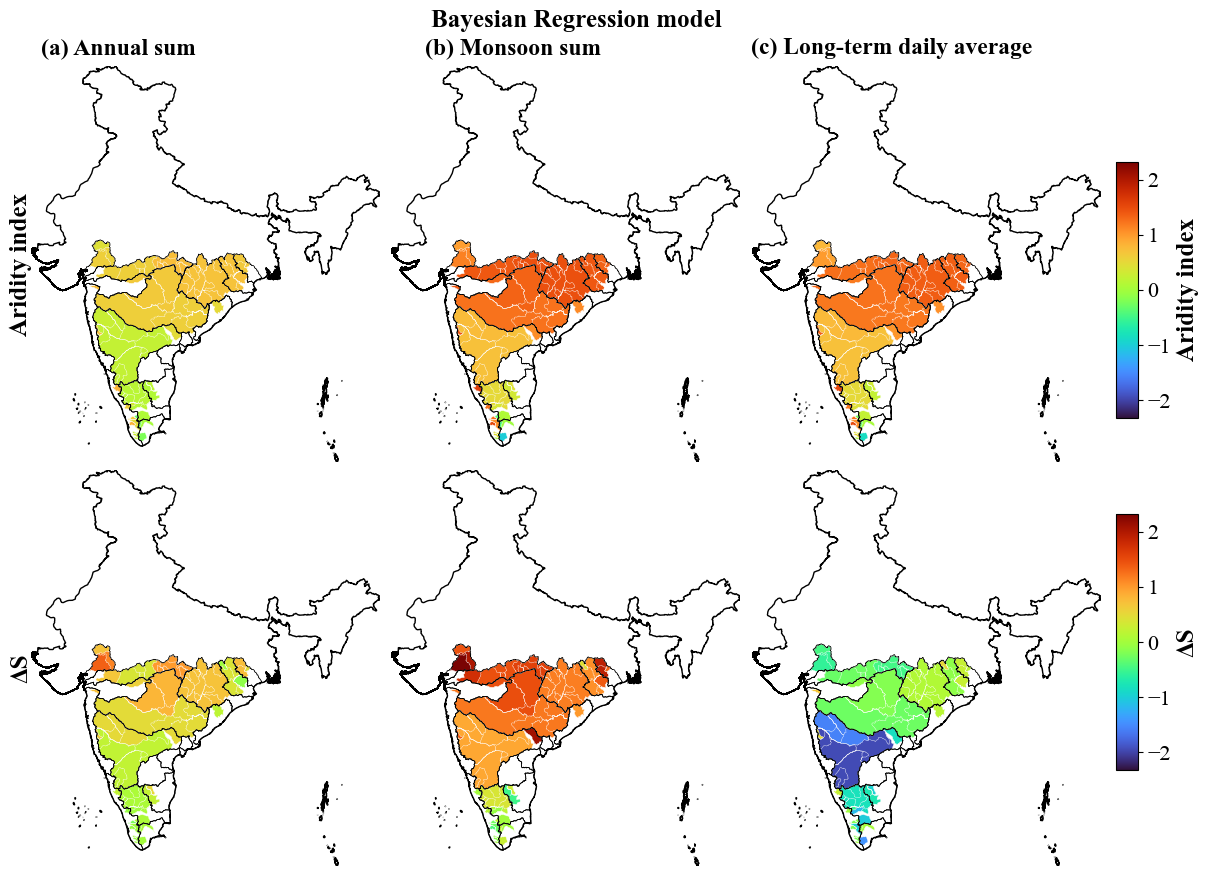

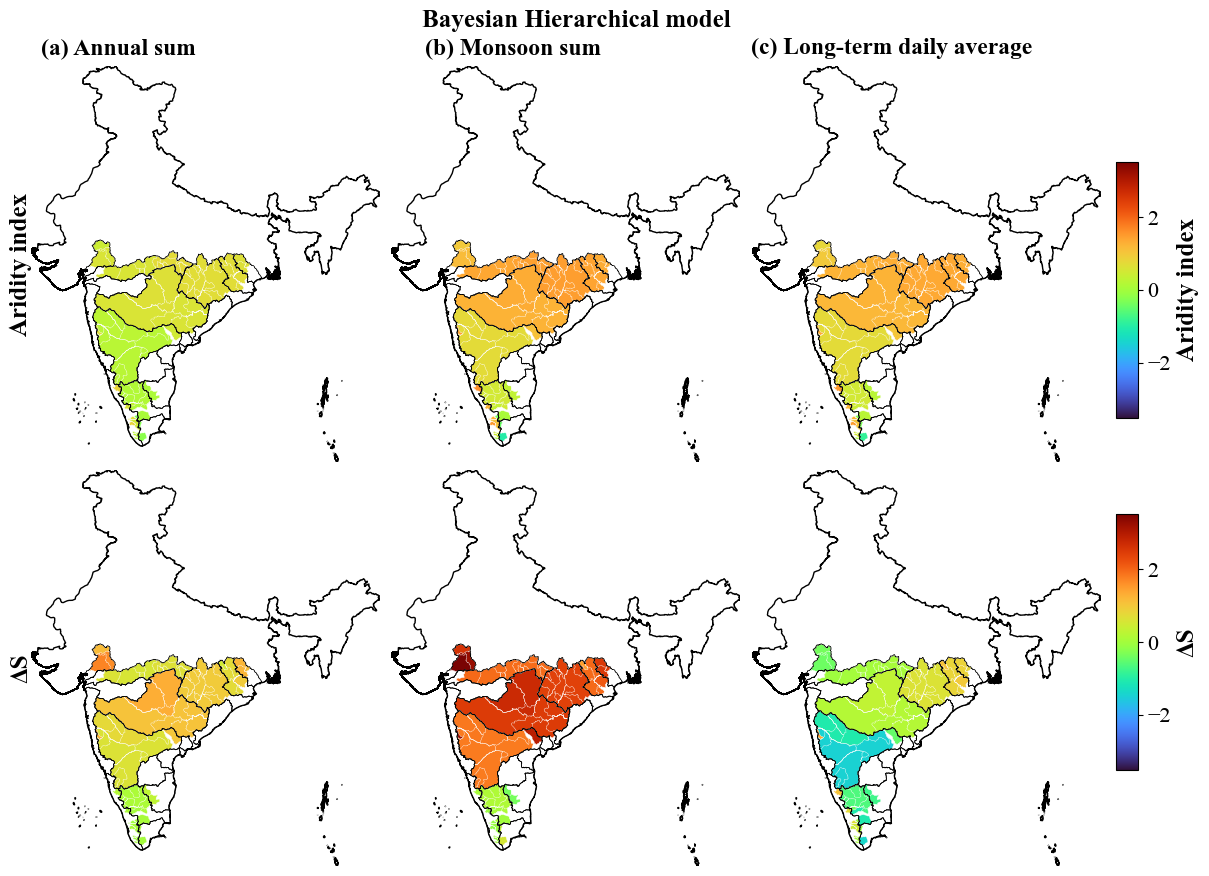


✅ Site-level Aridity & ΔS maps generated correctly.


In [17]:
# =====================================================
# IMPORTS
# =====================================================
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize

mpl.rcParams["font.family"] = "Times New Roman"

# =====================================================
# PATHS
# =====================================================
data_dir = r"C:\Users\User\OneDrive - The University of Melbourne\1 Poornima_Research_Work\5 Elasticity"
plot_dir = os.path.join(data_dir, "spatial plots")
shp_dir  = os.path.join(data_dir, "shapefiles")
os.makedirs(plot_dir, exist_ok=True)

delta_file = os.path.join(data_dir, "Delta_S_estimates.xlsx")

title_x = [0.25, 0.35, 0.40]
timescales = ["Asum", "Msum", "ltm"]
col_titles = ["(a) Annual sum", "(b) Monsoon sum", "(c) Long-term daily average"]

# =====================================================
# READ SHAPEFILES
# =====================================================
def read_and_project(path):
    return gpd.read_file(path).set_crs(4326).to_crs(3857)

catchments_gdf = read_and_project(
    os.path.join(shp_dir, "merged", "all_catchments_90.shp")
)

basins_gdf = read_and_project(
    os.path.join(shp_dir, "merged", "major_basins.shp")
)

india_gdf = read_and_project(
    os.path.join(shp_dir, "India", "india_boundary.shp")
)

catchments_gdf["gauge_id"] = catchments_gdf["gauge_id"].astype(str).str.zfill(5)

# =====================================================
# PREPARE SITE-LEVEL SPATIAL DATA (KEY STRUCTURE)
# =====================================================
def prepare_spatial_data(summary_df, catchments):

    summary_df["Gauge_ID"] = summary_df["Gauge_ID"].astype(str).str.zfill(5)

    spatial = {}

    for ts in timescales:

        df_ts = summary_df[summary_df["Timescale"] == ts].copy()

        # ensure one value per gauge
        df_ts = df_ts.groupby("Gauge_ID", as_index=False).agg(
            Aridity_mean=("Aridity_mean", "mean"),
            Delta_S_mean=("Delta_S_mean", "mean")
        )

        gdf_ts = catchments.merge(
            df_ts,
            left_on="gauge_id",
            right_on="Gauge_ID",
            how="inner"
        )

        spatial[ts] = gdf_ts

    return spatial

# =====================================================
# PLOT FUNCTION
# =====================================================
def plot_2x3_panel(summary_df, model_name, outfile):

    spatial = prepare_spatial_data(summary_df, catchments_gdf)

    # --- global symmetric normalization ---
    all_values = pd.concat([
        spatial[ts][["Aridity_mean", "Delta_S_mean"]] for ts in timescales
    ])

    global_max = max(
        abs(all_values["Aridity_mean"].min()),
        abs(all_values["Aridity_mean"].max()),
        abs(all_values["Delta_S_mean"].min()),
        abs(all_values["Delta_S_mean"].max())
    )

    arid_norm  = Normalize(vmin=-global_max, vmax=global_max)
    delta_norm = Normalize(vmin=-global_max, vmax=global_max)

    fig, axes = plt.subplots(
        2, 3,
        figsize=(11, 8),
        gridspec_kw={"wspace": 0.01, "hspace": 0.02}
    )

    for j, ts in enumerate(timescales):

        gdf_ts = spatial[ts]

        ax  = axes[0, j]
        ax2 = axes[1, j]

        # ---- ROW 1: ARIDITY ----
        gdf_ts.plot(
            column="Aridity_mean",
            cmap="turbo",
            norm=arid_norm,
            edgecolor="none",
            ax=ax,
            zorder=1
        )

        # ---- ROW 2: DELTA S ----
        gdf_ts.plot(
            column="Delta_S_mean",
            cmap="turbo",
            norm=delta_norm,
            edgecolor="none",
            ax=ax2,
            zorder=1
        )

        # ---- WHITE SUBBASIN BOUNDARIES ----
        catchments_gdf.boundary.plot(ax=ax, color="white", linewidth=0.25, zorder=2)
        catchments_gdf.boundary.plot(ax=ax2, color="white", linewidth=0.25, zorder=2)

        # ---- CONTEXT ----
        for a in (ax, ax2):
            basins_gdf.boundary.plot(ax=a, color="black", linewidth=0.5, zorder=3)
            india_gdf.plot(ax=a, facecolor="none", edgecolor="black", linewidth=1, zorder=4)
            a.margins(0)
            a.set_axis_off()

        axes[0, j].set_title(
            col_titles[j],
            fontsize=17,
            fontweight="bold",
            x=title_x[j],
            y=1.03,
            pad=0
        )

    # =================================================
    # ROW LABELS
    # =================================================
    axes[0, 0].text(-0.06, 0.5, "Aridity index",
                    transform=axes[0, 0].transAxes,
                    fontsize=18, fontweight="bold",
                    rotation=90, va="center")

    axes[1, 0].text(-0.06, 0.5, "ΔS",
                    transform=axes[1, 0].transAxes,
                    fontsize=18, fontweight="bold",
                    rotation=90, va="center")

    # =================================================
    # COLORBARS
    # =================================================
    cax1 = fig.add_axes([0.99, 0.56, 0.02, 0.32])
    cbar1 = fig.colorbar(mpl.cm.ScalarMappable(norm=arid_norm, cmap="turbo"), cax=cax1)
    cbar1.set_label("Aridity index", fontsize=18, fontweight="bold")
    cbar1.ax.tick_params(labelsize=16)

    cax2 = fig.add_axes([0.99, 0.12, 0.02, 0.32])
    cbar2 = fig.colorbar(mpl.cm.ScalarMappable(norm=delta_norm, cmap="turbo"), cax=cax2)
    cbar2.set_label("ΔS", fontsize=18, fontweight="bold")
    cbar2.ax.tick_params(labelsize=16)

    plt.subplots_adjust(left=0, right=0.98, top=1, bottom=0, wspace=0, hspace=0)

    fig.suptitle(model_name, fontsize=18, fontweight="bold", y=1.07)

    plt.savefig(os.path.join(plot_dir, outfile), dpi=400, bbox_inches="tight")
    plt.show()

# =====================================================
# RUN FOR BOTH MODELS
# =====================================================
models = [
    "Bayesian Regression model",
    "Bayesian Hierarchical model"
]

for i, sheet in enumerate(["BR", "BH"]):

    df = pd.read_excel(delta_file, sheet_name=sheet)

    plot_2x3_panel(
        summary_df=df,
        model_name=models[i],
        outfile=f"5_aridity_delta_s_{sheet}.png"
    )

print("\n✅ Site-level Aridity & ΔS maps generated correctly.")


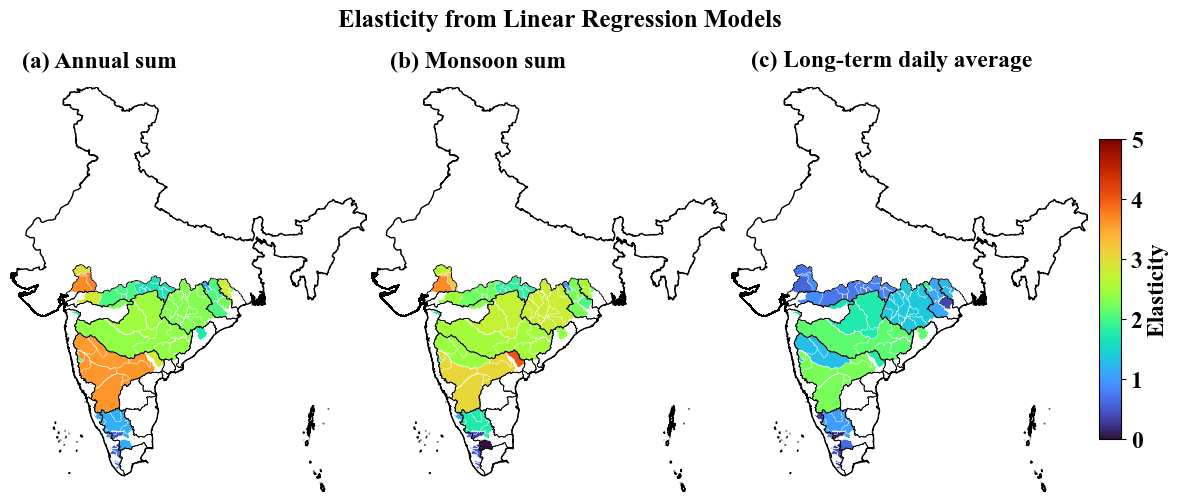

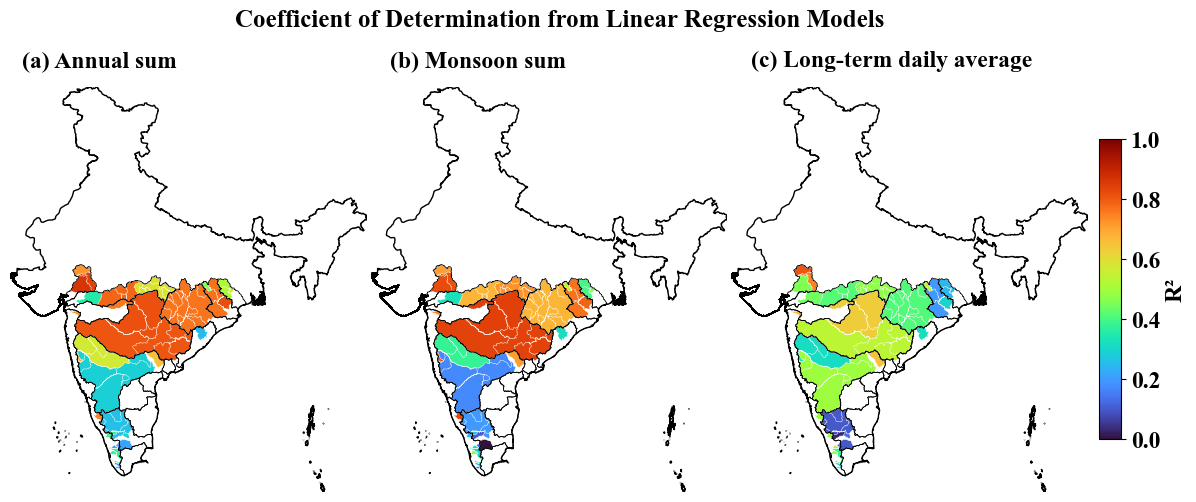

In [3]:
# =====================================================
# IMPORTS
# =====================================================
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize

mpl.rcParams["font.family"] = "Times New Roman"

# =====================================================
# PATHS
# =====================================================
data_dir = r"C:\Users\User\OneDrive - The University of Melbourne\1 Poornima_Research_Work\5 Elasticity"
plot_dir = os.path.join(data_dir, "spatial plots")
shp_dir  = os.path.join(data_dir, "shapefiles")
os.makedirs(plot_dir, exist_ok=True)

# =====================================================
# READ DATA
# =====================================================
summary_df = pd.read_excel(
    os.path.join(data_dir, "df_selected_P+PET.xlsx")
)
summary_df["gauge_id"] = summary_df["gauge_id"].astype(str).str.zfill(5)

# =====================================================
# READ SHAPEFILES
# =====================================================
def read_and_project(path):
    return gpd.read_file(path).set_crs(4326).to_crs(3857)

catchments_gdf = read_and_project(
    os.path.join(shp_dir, "merged", "all_catchments.shp")
)
basins_gdf = read_and_project(
    os.path.join(shp_dir, "merged", "major_basins.shp")
)
india_gdf = read_and_project(
    os.path.join(shp_dir, "India", "india_boundary.shp")
)

catchments_gdf["gauge_id"] = catchments_gdf["gauge_id"].astype(str).str.zfill(5)

# =====================================================
# SPATIAL MERGE
# =====================================================
spatial_gdf = catchments_gdf.merge(summary_df, on="gauge_id", how="inner")

# =====================================================
# COLUMN SETS
# =====================================================
elasticity_cols = [
    "Elasticity_AnnualSum",
    "Elasticity_MonsoonSum",
    "Elasticity_LongTermMean"
]

r2_cols = [
    "R2_AnnualSum",
    "R2_MonsoonSum",
    "R2_LongTermMean"
]

titles = ["(a) Annual sum", "(b) Monsoon sum", "(c) Long-term daily average"]
title_x = [0.25, 0.3, 0.45]

# =====================================================
# NORMALISATION
# =====================================================
ELASTICITY_NORM = Normalize(
    vmin=0.0,
    vmax=5 #spatial_gdf[elasticity_cols].max().max()
)
R2_NORM = Normalize(vmin=0.0, vmax=1.0)

# =====================================================
# GENERIC PLOTTING FUNCTION
# =====================================================
def plot_spatial_panel(
    gdf, cols, norm, cbar_label, suptitle, outfile
):
    fig, axes = plt.subplots(1, 3, figsize=(11, 5), gridspec_kw={"wspace": 0.01})

    for ax, col, title, xloc in zip(axes, cols, titles, title_x):
        gdf.plot(
            column=col,
            cmap="turbo",
            norm=norm,
            edgecolor="none",
            ax=ax
        )
    
        gdf.boundary.plot(ax=ax, color="white", linewidth=0.3)
        basins_gdf.boundary.plot(ax=ax, color="black", linewidth=0.5)
        india_gdf.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)
    
        ax.margins(0)        # 🔥 KEY LINE
        ax.set_axis_off()
    
        ax.set_title(
            title,
            fontsize=17,
            fontweight="bold",
            x=xloc,
            y=1.05,
            pad=0
        )

    # ---- COLORBAR ----
    cax = fig.add_axes([0.99, 0.2, 0.02, 0.60])
    cbar = fig.colorbar(
        mpl.cm.ScalarMappable(norm=norm, cmap="turbo"),
        cax=cax
    )
    cbar.set_label(cbar_label, fontsize=17, fontweight="bold")
    cbar.ax.tick_params(labelsize=17)
    for t in cbar.ax.get_yticklabels():
        t.set_fontweight("bold")

    fig.suptitle(
        suptitle,
        fontsize=18,
        fontweight="bold",
        y=1.06
    )

    plt.subplots_adjust(left=0, right=0.98, top=1, bottom=0, wspace=0)

    plt.savefig(
        os.path.join(plot_dir, outfile),
        dpi=400,
        bbox_inches="tight"
    )
    plt.show()

# =====================================================
# FIGURE 1: ELASTICITY
# =====================================================
plot_spatial_panel(
    spatial_gdf,
    elasticity_cols,
    ELASTICITY_NORM,
    "Elasticity",
    "Elasticity from Linear Regression Models",
    "1 Elasticity_LR_P_PET.png"
)

# =====================================================
# FIGURE 2: R²
# =====================================================
plot_spatial_panel(
    spatial_gdf,
    r2_cols,
    R2_NORM,
    "R²",
    "Coefficient of Determination from Linear Regression Models",
    "1 R2_LR_P_PET.png"
)